#Análise COVID-19 no Brasil

*última atualização do dataset: 05/2021<br>
Fonte: https://www.kaggle.com/datasets/unanimad/corona-virus-brazil


##Uma imagem vale mais do que mil palavras.
###A Visualização de Dados é uma forma de representar informações complexas de modo gráfico e facilmente compreensível.

###Importando bibliotecas que serão utilizadas ao longo da análise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from plotly.subplots import make_subplots
from plotly.graph_objs import *
from plotly.graph_objs.scatter.marker import Line
from datetime import datetime

### O dataset utilizado foi montado diretamente do meu drive

In [2]:
covid_data = "/content/drive/MyDrive/Covid_Br/brazil_covid19.csv"
covid_df = pd.read_csv(covid_data)

###5 primeiras linhas do Dataframe.

In [ ]:
covid_df.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0
1,2020-02-25,Centro-Oeste,GO,0.0,0
2,2020-02-25,Centro-Oeste,MS,0.0,0
3,2020-02-25,Centro-Oeste,MT,0.0,0
4,2020-02-25,Nordeste,AL,0.0,0


###Tendência envolvendo número de casos e de mortes.

Coletando números de casos e mortes diários. Salvando o resultando em 2 dataframes distintos.

In [5]:
covid_casos = covid_df['cases'].groupby(covid_df['date']).sum().sort_values(ascending=True)
covid_mortes = covid_df['deaths'].groupby(covid_df['date']).sum().sort_values(ascending=True)

Calculando o números de dias passados desde a detecção do primeiro caso de Covid.

In [6]:
dias_covid = np.array([i for i in range(len(covid_casos))])
# remodelando o array para que seja compatível ao formato dos dataframes covid_casos e covid_mortes
dias_covid.reshape(-1,1)
# repetindo o mesmo processo para determinar o número de dias passados após a primeira morte ocasionada pelo vírus
dias_covid_morte = np.array([i for i in range(len(covid_mortes))]).reshape(-1,1)

###Plotando os resultados.

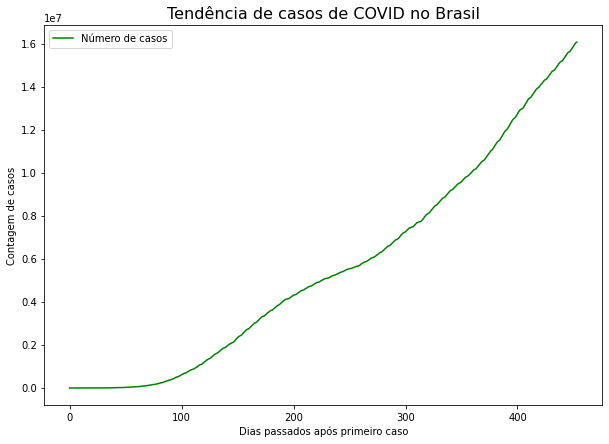

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(dias_covid, covid_casos, color='green', label='Número de casos')
plt.title('Tendência de casos de COVID no Brasil', fontsize=16)
plt.xlabel('Dias passados após primeiro caso')
plt.ylabel('Contagem de casos')
plt.legend(loc="upper left")
plt.show()

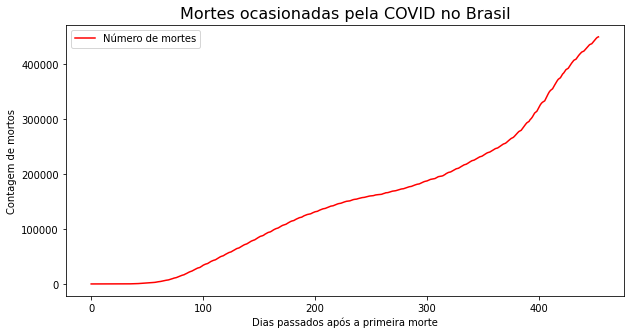

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(dias_covid_morte, covid_mortes, label='Número de mortes', color='red')
plt.title('Mortes ocasionadas pela COVID no Brasil', fontsize=16)
plt.xlabel('Dias passados após a primeira morte')
plt.ylabel('Contagem de mortos')
plt.legend(loc="upper left")
plt.show()

Observamos um aumento exponencial no número tanto de casos quanto de mortos.

###Relação entre número de casos de número de mortos.

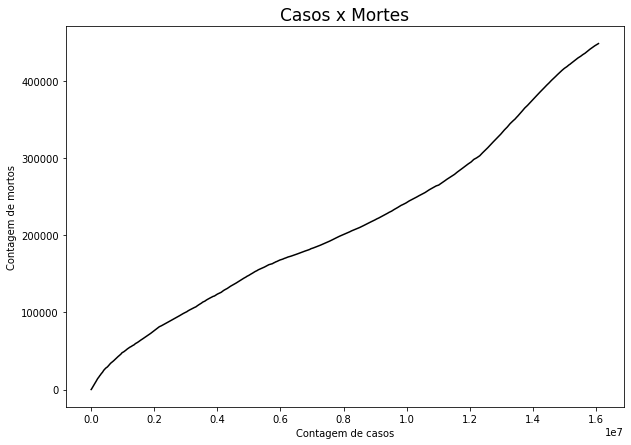

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(covid_casos, covid_mortes, color='black')
plt.title('Casos x Mortes', fontsize=17)
plt.xlabel('Contagem de casos')
plt.ylabel('Contagem de mortos')
plt.show()

**Podemos observar uma forte relação linear positiva entre o número de Casos e Mortes.**

### Taxa de Mortalidade através do tempo.

In [11]:
# calculando a taxa % de mortalidade
mortalidade_covid = round((covid_mortes/covid_casos)*100, 2)
mort = mortalidade_covid.reset_index('date')
mort.rename(columns={0:'taxa'}, inplace=True)

A **taxa de mortalidade** foi calculada ao dividir o número de mortes confirmadas pela quantidade de casos ao longo dos dias.

In [12]:
mortalidade_covid = round((covid_mortes/covid_casos)*100,2)

datas = mortalidade_covid.index

fig = go.Figure(data=[
    go.Line(name='Mortalidade em %', x=datas, y=mortalidade_covid, mode="lines+markers")    
])

fig['layout'].update(title="Taxa de Mortalidade", title_x=0.5, xaxis_title='Meses', yaxis_title='Taxa de Mortalidade')

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Apesar do crescimento exponencial do número de mortes ao longo dos  primeiros 2 meses, a partir de Maio/2020 a Taxa de Mortalidade entrou em queda, apresentando uma leve alta em meados de Abril/2021.

###Casos por Região

Criando uma função para executar plotagens.

In [ ]:
def plot_pie(parametro, titulo):
  covid_regiao = covid_df[parametro].groupby(covid_df['region']).sum()
  regioes = covid_regiao.reset_index('region')
  separacao = [0.1, 0.1, 0.1, 0.1, 0.1]
  plt.pie(regioes[parametro], labels=regioes['region'], explode=separacao, startangle=180, shadow=True, radius=2.5, autopct='%1.1f%%')
  plt.title(titulo, fontsize=17, pad=130)
  plt.show()


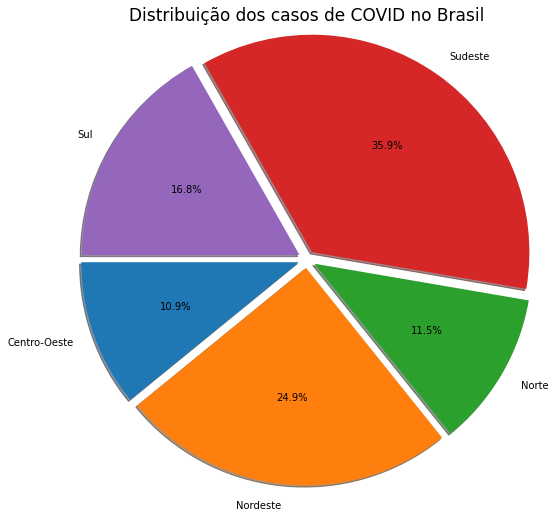

In [ ]:
titulo = 'Distribuição dos casos de COVID no Brasil'
plot_pie('cases',titulo)

### Mortes por região

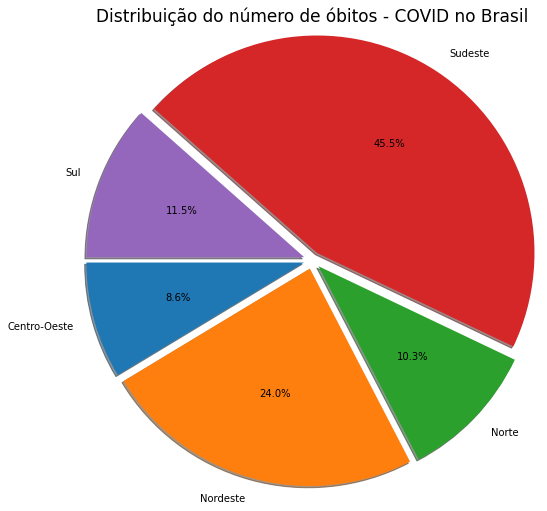

In [ ]:
titulo = 'Distribuição do número de óbitos - COVID no Brasil'
plot_pie('deaths', titulo)

As regiões Sul e Sudeste, devido a alta densidade demográfica, respondem por mais da metade dos números de Casos e Óbitos relacionados à COVID.

###Crescimento do número de mortes através do tempo.

In [8]:
# para obter a diferença, é necessária a obtenção dos números de mortes/dia
mortes_hoje = covid_df[['deaths']].groupby(covid_df['date']).sum().sort_values(by='deaths', ascending=True).shift(-1) #ajustando o índice
mortes_ontem = covid_df[['deaths']].groupby(covid_df['date']).sum().sort_values(by='deaths', ascending=True)

Calculando a taxa de crescimento

In [9]:
#taxa de mortes
taxa_mortes = mortes_hoje - mortes_ontem
taxa_mortes.dropna(inplace=True) #excluindo valores nulos

Plotagem dos resultados

In [10]:
layout = Layout(height=1200, xaxis_title='Mês', legend=dict(font=dict(family="Arial", size=20)), legend_title=dict(font=dict(family="Arial", size=10)))


grafico = make_subplots(subplot_titles='Crescimento do nº de mortes')

grafico.append_trace(go.Line(name='Novas mortes por dia', x=taxa_mortes.index, y=taxa_mortes['deaths'], mode="lines+markers"), row=1, col=1)

grafico.update_xaxes(title_text="Meses",row=1, col=1)
grafico.update_yaxes(title_text="Mortes por dia", row=1, col=1)

grafico['layout'].update(layout)
grafico.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




###Evolução do número de casos de COVID de acordo com a Região

Agregando os números de casos de acordo com as Regiões

In [ ]:
casos_regiao = covid_df.groupby(['region','date']).agg({'cases':'sum'}).reset_index()
casos_regiao.value_counts()

region        date        cases    
Centro-Oeste  2020-02-25  0.0          1
Sudeste       2020-07-28  843402.0     1
              2020-07-22  760498.0     1
              2020-07-23  780732.0     1
              2020-07-24  800763.0     1
                                      ..
Nordeste      2020-12-17  1786793.0    1
              2020-12-16  1775634.0    1
              2020-12-15  1759822.0    1
              2020-12-14  1751622.0    1
Sul           2021-05-23  3068483.0    1
Length: 2270, dtype: int64

Plotando resultados

In [ ]:
grafico = px.line(casos_regiao[['date','cases', 'region']], x='date', y='cases', color='region')
grafico.update_layout(title='Evolução do número de casos',  title_x=0.5,
                  xaxis_title='Data', yaxis_title='Número de casos', legend_title='<b>Regiões</b>',
                  legend=dict(x=0.02,y=0.98))
grafico.show()

##Considerações Finais

Através dessa pequena análise, é notório o crescimento exponencial do número de casos e mortes no Brasil, no período compreendido entre Março de 2020 e Junho e 2021.<br>
É possível também observar que o Sul do país, devido à sua alta densidade demográfica, foi a região mais afetada. 